In [1]:
import intake
import xarray as xr
import math
import cftime
import numpy as np
import matplotlib.pyplot as plt
import fv3viz

In [2]:
state = intake.open_zarr("gs://vcm-ml-experiments/claytons/2022-08-10/oos-wind-vanilla-trial2/fv3gfs_run/state_after_timestep.zarr").to_dask()

atmos = intake.open_zarr("gs://vcm-ml-experiments/claytons/2022-08-10/oos-wind-vanilla-trial2/fv3gfs_run/atmos_dt_atmos.zarr").to_dask() \
    .rename({"grid_xt": "x", "grid_yt": "y", "grid_y": "y_interface", "grid_x": "x_interface"})

In [3]:
def find_coords_by_lat_lon(lat, lon):
    dist = (state.latitude.isel(time=0) - lat * math.pi / 180)**2 + (state.longitude.isel(time=0) - lon * math.pi / 180)**2
    min_coords = np.where(dist == dist.min())
    return min_coords[0][0], min_coords[1][0], min_coords[2][0]


def mark_point(x,y,tile, da):
    return da.where(
        (da['x']!=x) | (da['y']!=y), -1e9
    )

In [4]:
grid = atmos[["lat", "lon", "area"]]

#### First point is (-44, 31), left column of Fig. 2


Time range is the first time the two OCSVM detectors increase score and become positive.

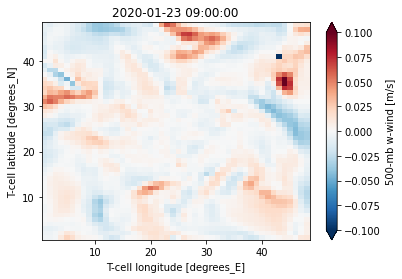

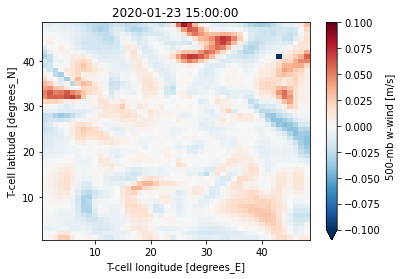

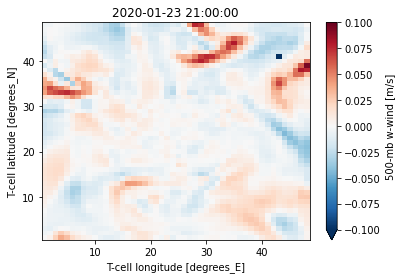

In [20]:
tile, x, y = find_coords_by_lat_lon(lat=-44, lon=31)
tsel = slice(cftime.DatetimeJulian(2020,1,23,8),cftime.DatetimeJulian(2020,1,24,), 2)
ds0 = mark_point(x, y, tile, atmos.sel(time=tsel))

for t in ds0.time:
    ds0.sel(time=t).sel(tile=tile).w500.plot(vmax=0.1)
    plt.title(t.item())
    plt.show()

Second time the OCSVM detectors spike up positive

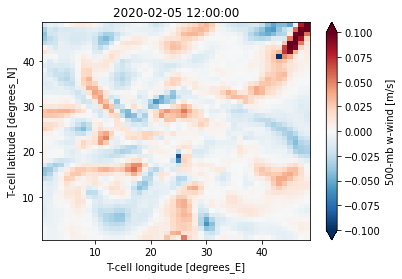

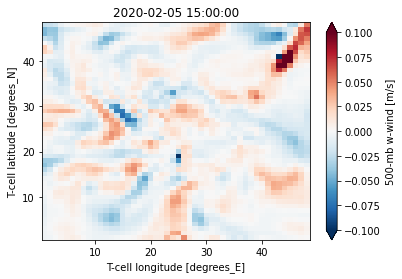

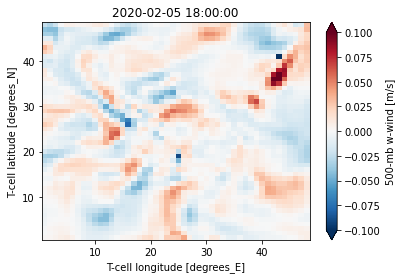

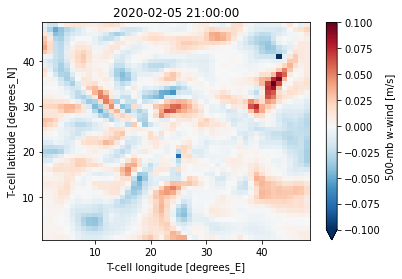

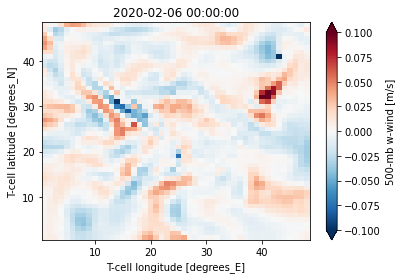

In [36]:
tile, x, y = find_coords_by_lat_lon(lat=-44, lon=31)
tsel = slice(cftime.DatetimeJulian(2020,2,5,10),cftime.DatetimeJulian(2020,2,6,2))
ds0 = mark_point(x, y, tile, atmos.sel(time=tsel))

for t in ds0.time:
    ds0.sel(time=t).sel(tile=tile).w500.plot(vmax=0.1)
    plt.title(t.item())
    plt.show()

#### Second point is (11, 349), right column of Fig. 2

Time range chosen as the first time when the OCSVM detectors start to increase and become positive.

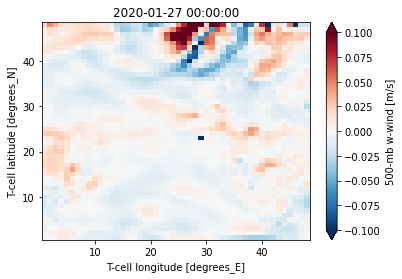

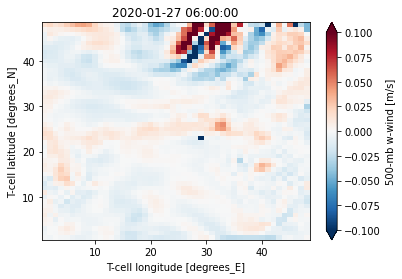

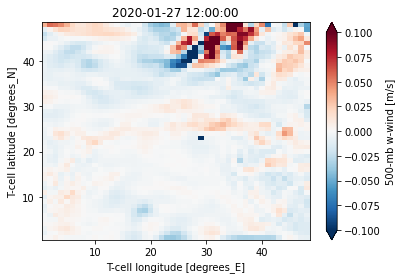

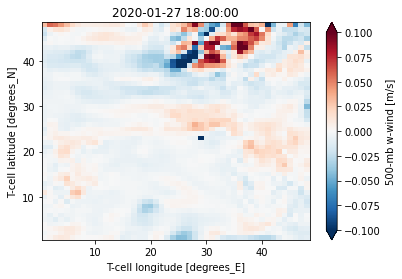

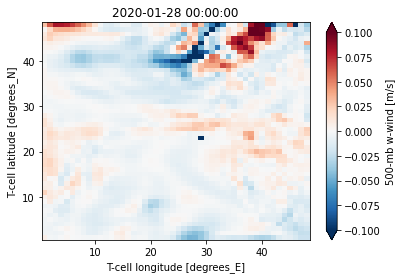

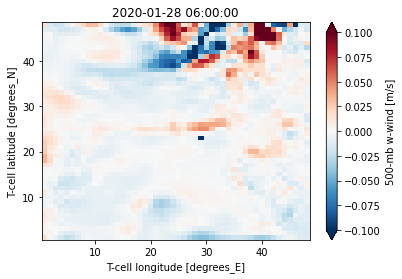

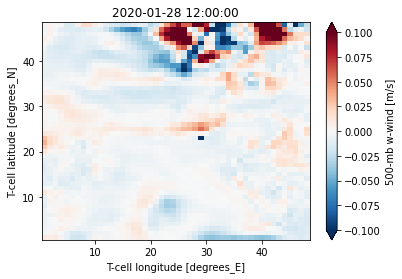

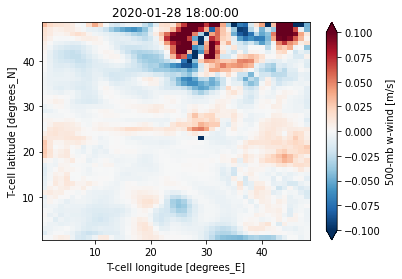

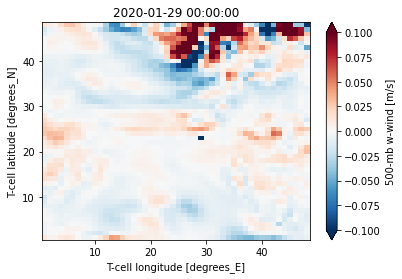

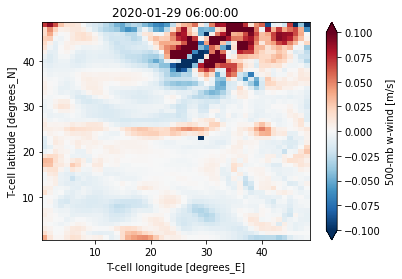

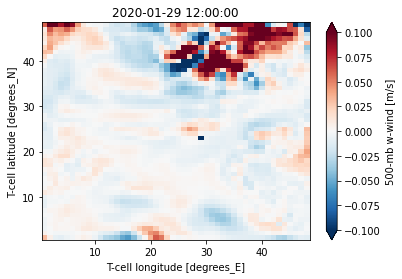

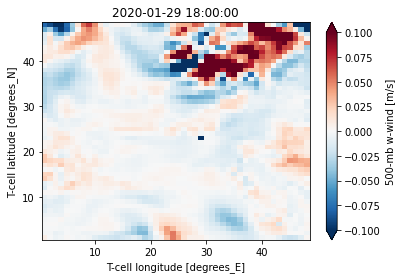

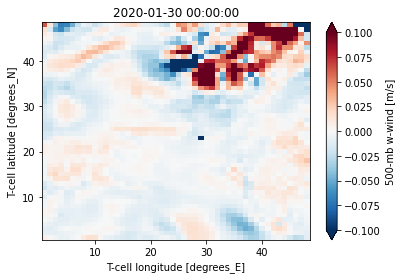

In [8]:
tile, x, y = find_coords_by_lat_lon(lat=11, lon=349)
tsel = slice(cftime.DatetimeJulian(2020,1,27),cftime.DatetimeJulian(2020,1,30), 2)
ds0 = mark_point(x, y, tile, atmos.sel(time=tsel))

for t in ds0.time:
    ds0.sel(time=t).sel(tile=tile).w500.plot(vmax=0.1)
    plt.title(t.item())
    plt.show()